In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scy

g=9.8


In [3]:
GM=1.0
class Cuerpo:
    def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
        self.m = m0
        self.r = np.array([x0,y0,z0])
        self.V = np.array([Vx0,Vy0,Vz0])

    def CalculeFuerza(self):
        aux = -GM*self.m/np.linalg.norm(self.r)**3
        self.F = aux*self.r
    def Muevase(self,dt):
        self.r = self.r + dt*self.V
        self.V = self.V + (dt/self.m)*self.F

In [4]:
#Condiciones Inicia;es
Deltat=1e-3
Nsteps=int(1e5)
StepsPerFrame=int(1e2)
Nframes=Nsteps//StepsPerFrame
r0 =10

In [5]:
r0=10
omega=np.sqrt(GM/(r0**3))
T=2*np.pi/omega
V0=omega*r0

xdata=np.zeros(Nframes)
ydata=np.zeros(Nframes)
Balon=Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)

for i in range(Nsteps):
    t=i*Deltat
    if(i%StepsPerFrame==0):
        k = i//StepsPerFrame
        xdata[k]=Balon.r[0]
        ydata[k]=Balon.r[1]
    Balon.CalculeFuerza()
    Balon.Muevase(Deltat)

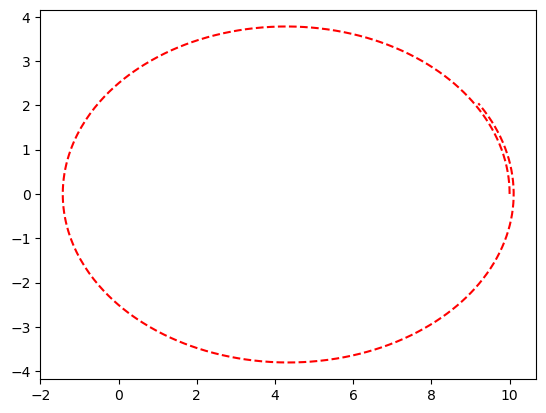

In [6]:
plt.plot(xdata,ydata,"r--")
plt.show()

In [7]:
fig = plt.figure()
ax = plt.axes(xlim=(0,40), ylim=(-8,4.5))
line, = ax.plot([], [],'o')
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x=np.zeros(Nframes)
    y=np.zeros(Nframes)
    if(i%StepsPerFrame==0):
        k = i//StepsPerFrame
        x = xdata[k]
        y = ydata[k]
    line.set_data(x, y)
    return line,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nsteps, interval=20, blit=False)
anim.save('Planetas.gif', fps=30, writer='pillow')
plt.show()

C:\Users\cterr\AppData\Local\Temp\ipykernel_11916\2393948447.py:14: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(x, y)


#Codigo en C++

In [20]:
def graficar(datos):

    path = "./"+ datos + ".dat"
    data = pd.read_csv(path,sep=' ',names=['t','x1','x2'])

    plt.plot(data['t'],data['x1'],label='x1')

In [36]:
%%writefile UnPlaneta.cpp


#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

const double GM=1.0;

//Deaclaración de la clase
class Cuerpo;

//Deaclaración de la interfase
class Cuerpo{
private:
  vector3D r,V,F; double m,R;
public:
  void Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0);
  void CalculeFuerza(void);
  void Muevase(double dt);
  double Getx(void){return r.x();}; // Inline
  double Gety(void){return r.y();}; // Inline
};
//Implementación de las funciones
void Cuerpo::Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  double aux = -GM * m / pow(r.norm(),3);
  F= aux*r;
}
void Cuerpo::Muevase(double dt){
  //Algoritmo de Euler
  r+=V*dt;  V+=F*(dt/m);
}

//----------- Funciones Globales -----------


int main(){
  vector3D r;
  double GM = 1.0;
  int Nsteps = 100000;  // Ajusta según sea necesario
  double dt = 0.001;  // Suponiendo que T está definido
  int StepsPerFrame = 1000;  // Ajusta según sea necesario
  int Nframes = Nsteps / StepsPerFrame;
  Cuerpo Planeta;

  double r0=10;
  double omega=sqrt(GM/pow(r0,3));
  double T=2/omega;
  double V0=omega*r0;

  r.load(1,1,1);

  //----------(x0,y0,z0,Vx0,Vy0,Vz0,m0 ,R0)
  Planeta.Inicie(r0,0,0,0,0.5*V0,0,0.453,1);


  for (int t = 0; t < Nsteps; t++) {

        if (t % StepsPerFrame == 0) {
            int k = t / StepsPerFrame;
            cout<<Planeta.Getx()<<" "<<Planeta.Gety()<<endl;
        }

    Planeta.CalculeFuerza();
    Planeta.Muevase(dt);

  }
  return 0;
}


Overwriting UnPlaneta.cpp


In [37]:
%%shell
g++ UnPlaneta.cpp
./a.out > datos.dat

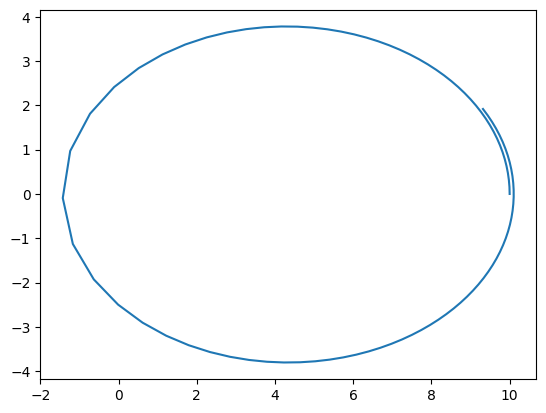

In [38]:
graficar("datos")